# COMP3223 - Coursework

# Appendix A: Data 1 - Separate two Gaussians

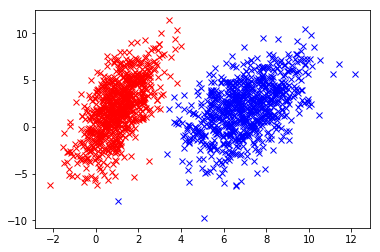

In [166]:
# 4.1 Separate 2 Gaussians, setting up enviroment

# Generating data from two dimensional Gaussian distributions 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

na = 800
nb = 800
ma = [7, 2] # First mean vector
sa = [[2, 2], [2, 8]]  # First diagonal covariance
mb = [1, 2] # Second mean vector
sb = [[1,2],[2,10]] # Second diagonal covariance

x, y = np.random.multivariate_normal(ma, sa, na).T 
x2, y2 = np.random.multivariate_normal(mb, sb, nb).T

X_1tot = np.random.multivariate_normal(ma, sa, na)
X_2tot = np.random.multivariate_normal(mb, sb, nb)

plt.plot(x, y, 'x', color = 'blue')
plt.plot(x2, y2, 'x', color = 'red')
plt.show()

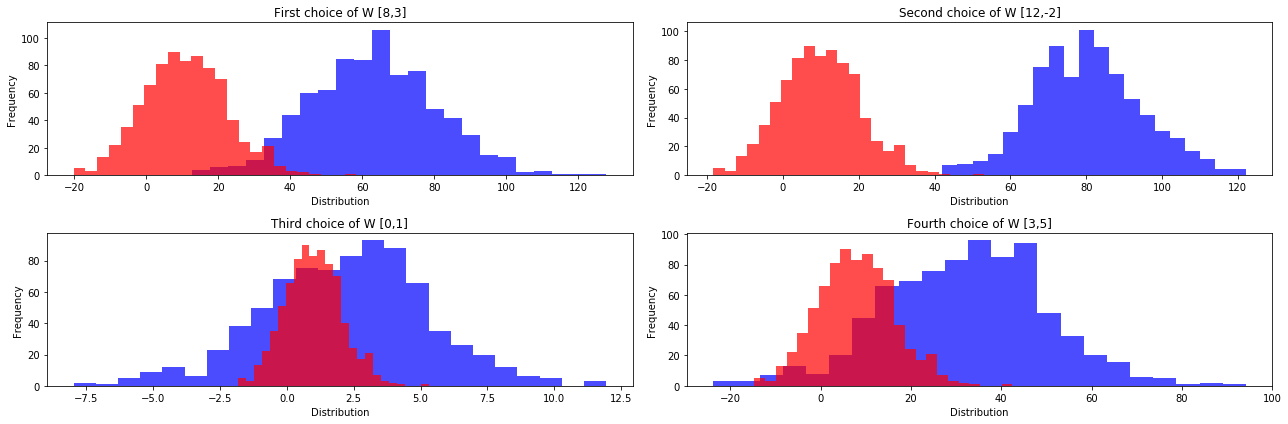

In [29]:
# 1(a) Plotting ya and yb histograms for differents w values

X_1 = np.array([x,y])
X_2 = np.array([x2,x2])

# First choice of W [8,3]
W = np.array([8,3]).T
Y_A = np.array([np.dot(W.T,np.array([X_1[0,n],X_1[1,n]]))for n in range(na)])
Y_B = np.array([np.dot(W.T,np.array([X_2[0,n],X_2[1,n]])) for n in range(nb)])
fig, axes = plt.subplots(figsize=(18,6),nrows= 2,ncols=2)
axes[0][0].hist(Y_A,color= ['blue'],bins="auto",alpha = 0.7)
axes[0][0].hist(Y_B,color= ['red'],bins="auto",alpha = 0.7)
axes[0][0].set_title("First choice of W [8,3]")
axes[0][0].set_xlabel('Distribution')
axes[0][0].set_ylabel('Frequency')

# Second choice of W [12,-2]
W = np.array([12,-2]).T
Y_A = np.array([np.dot(W.T,np.array([X_1[0,n],X_1[1,n]]))for n in range(na)])
Y_B = np.array([np.dot(W.T,np.array([X_2[0,n],X_2[1,n]]))for n in range(nb)])
axes[0][1].hist(Y_A,color=['blue'],bins="auto",alpha = 0.7)
axes[0][1].hist(Y_B,color=['red'],bins="auto",alpha = 0.7)
axes[0][1].set_title("Second choice of W [12,-2]")
axes[0][1].set_xlabel('Distribution')
axes[0][1].set_ylabel('Frequency')

# Third choice of W [0,1]
W = np.array([0,1]).T
Y_A = np.array([np.dot(W.T,np.array([X_1[0,n],X_1[1,n]]))for n in range(na)])
Y_B = np.array([np.dot(W.T,np.array([X_2[0,n],X_2[1,n]]))for n in range(nb)])
axes[1][0].hist(Y_A,color=['blue'],bins="auto",alpha = 0.7)
axes[1][0].hist(Y_B,color=['red'],bins="auto",alpha = 0.7)
axes[1][0].set_title("Third choice of W [0,1]")
axes[1][0].set_xlabel('Distribution')
axes[1][0].set_ylabel('Frequency')

# Fourth choice of W [3,5]
W = np.array([3,5]).T
Y_A = np.array([np.dot(W.T,np.array([X_1[0,n],X_1[1,n]]))for n in range(na)])
Y_B = np.array([np.dot(W.T,np.array([X_2[0,n],X_2[1,n]]))for n in range(nb)])
axes[1][1].hist(Y_A,color=['blue'],bins= "auto",alpha = 0.7)
axes[1][1].hist(Y_B,color=['red'],bins="auto",alpha = 0.7)
axes[1][1].set_title("Fourth choice of W [3,5]")
axes[1][1].set_xlabel('Distribution')
axes[1][1].set_ylabel('Frequency')

fig.tight_layout() # Increasing spacing between subplots

Using F(w) formula
Maximum F value 32.426890340956255 at theta= 3.718882681564246
Therefore W at max F is: [-8.34082306  1.85220698]


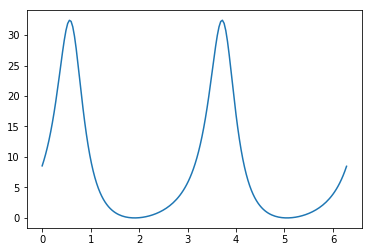

In [30]:
# 1(b) plotting the dipendence of F(w) on the direction of w

print("Using F(w) formula")
# Choosing the W of the first plot
W = np.array([8, 3])
maximum = 0
angle = 0

Fresults = []
for theta in np.linspace(0,6.28,180):  
    # Making theta vary between 0 and 360 degrees
    R = np.array([[np.cos(theta), -np.sin(theta)], 
                  [np.sin(theta), np.cos(theta)]])
    Wtheta = np.array(np.matmul(W,R))

    Y_A =[]
    Y_B =[]
    for i in range(len(X_1tot)):
        Y_A.append(np.dot(Wtheta.T,X_1tot[i, :]))

    for i in range(len(X_2tot)):
        Y_B.append(np.dot(Wtheta.T,X_2tot[i, :]))
    
    mares = np.mean(Y_A)
    mbres = np.mean(Y_B)
    sares = np.std(Y_A)
    sbres = np.std(Y_B)
    
    # Calculating Fisher ratio
    nr1 = na/(na+nb) # Making F calculation easier
    nr2 = nb/(na+nb)
    F = (((mares - mbres)**2)/(nr1*(sares**2) + 
                               nr2*(sbres**2)))
    if maximum < F:
        maximum = F
        angle = theta
    Fresults.append(F)
    
Fresults =np.array(Fresults)
print("Maximum F value", maximum, "at theta=", angle)
Rmax = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), 
                                                   np.cos(angle)]])
Wthetamax = np.array(np.matmul(W,Rmax))
print("Therefore W at max F is:", Wthetamax)

fig = plt.figure()
allangles = np.linspace(0,6.28,180)
plt.plot(allangles, Fresults, '-')

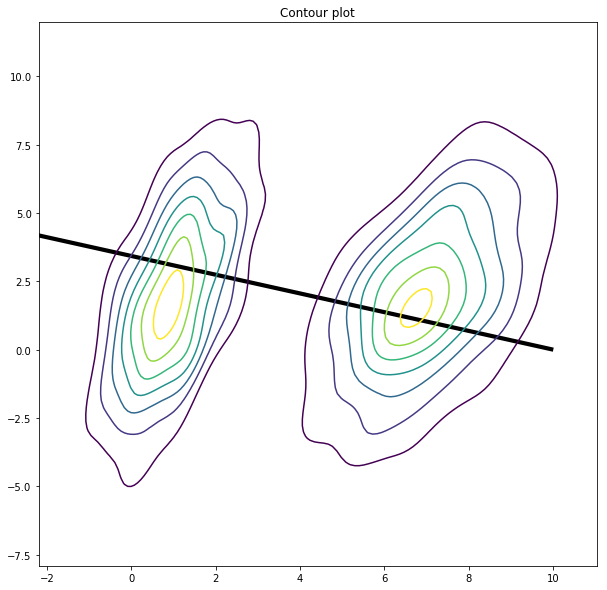

In [31]:
# 2(a) Equi-probable contour lines for each class and direction
# of the optimal vector 

from scipy.stats import kde

na = 800
nb = 800
ma = [7, 2] # First mean vector
sa = [[2, 2], [2, 8]]  # First diagonal covariance
mb = [1, 2] # Second mean vector
sb = [[1,2],[2,10]] # Second diagonal covariance

x, y = np.random.multivariate_normal(ma, sa, na).T 
x2, y2 = np.random.multivariate_normal(mb, sb, nb).T

bins_n = 80
wopt = [-8.34082306, 1.85220698]

fig, ax = plt.subplots(figsize=(10, 10))

# First Gaussian
k = kde.gaussian_kde(np.random.multivariate_normal(ma, sa, na).T)
xi, yi = np.mgrid[x.min():x.max():bins_n*1j, y.min():y.max():bins_n*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

# Second Gausssian
k2 = kde.gaussian_kde(np.random.multivariate_normal(mb, sb, nb).T)
xi2, yi2 = np.mgrid[x2.min():x2.max():bins_n*1j, y2.min():y2.max():bins_n*1j]
zi2 = k2(np.vstack([xi2.flatten(), yi2.flatten()]))

ax.set_title('Contour plot')

ax.contour(xi, yi, zi.reshape(xi.shape) )
ax.contour(xi2, yi2, zi2.reshape(xi2.shape) )

ax.quiver(10,0, wopt[0], wopt[1], scale=8, color='black')

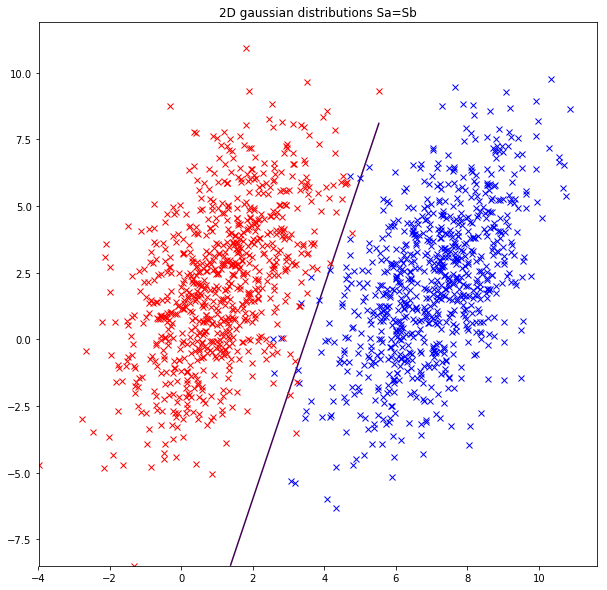

In [32]:
# 2(b) Plot of the decision boundary where the log odds vanishes Sa=Sb

ma = [7, 2] # First mean vector
sa = [[2, 2],[2, 8]]  # First diagonal covariance
mb = [1, 2] # Second mean vector
sb = [[2,2],[2,8]] # Second diagonal covariance

x, y = np.random.multivariate_normal(ma, sa, na).T 
x2, y2 = np.random.multivariate_normal(mb, sb, nb).T

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(x,y,'x',color='blue')
plt.plot(x2,y2,'x',color='red')
ax.set_title( "2D gaussian distributions Sa=Sb" )

X_1_g, Y_1_g = np.mgrid[min(x):max(x): 0.01 , min(y):max(y):0.01 ]
pos = np.dstack((X_1_g, Y_1_g))
rv2 = multivariate_normal(ma, sa)

X_2_g, Y_2_g = np.mgrid[min(x2):max(x2): 0.01 , min(y2):max(y2): 0.01 ]
pos = np.dstack((X_2_g, Y_2_g))
rv = multivariate_normal(mb, sb)

res = rv.pdf(pos)-rv2.pdf(pos)

ax.contour(X_2_g, Y_2_g, res, levels = [0])

plt.show()

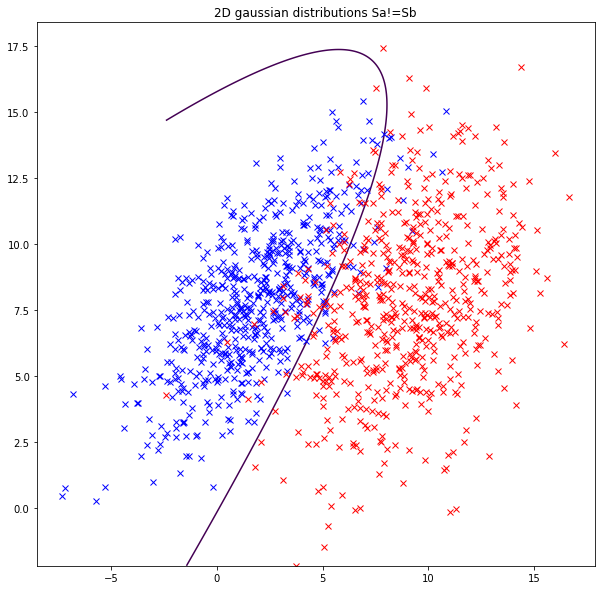

In [33]:
# 2(b) Plot of the decision boundary where the log odds vanishes Sa!=Sb

Nq = 600
maq = [2.0,8.0]
saq = [[7,5],[5,7]]
mbq = [9.0,8.0]
sbq = [[8,3],[3,10]]

x, y = np.random.multivariate_normal(maq, saq, Nq).T
x2, y2 = np.random.multivariate_normal(mbq, sbq, Nq).T

fig, ax = plt.subplots(figsize=(10, 10))

plt.plot(x,y,'x',color='blue')
plt.plot(x2,y2,'x',color='red')
ax.set_title("2D gaussian distributions Sa!=Sb")

X_1_gq, Y_1_gq = np.mgrid[min(x):max(x): 0.01 , min(y):max(y): 0.01 ]
pos = np.dstack((X_1_gq, Y_1_gq))
rv2 = multivariate_normal(maq, saq)

X_2_gq, Y_2_gq = np.mgrid[min(x2):max(x2): 0.01 , min(y2):max(y2): 0.01 ]
pos = np.dstack((X_2_gq, Y_2_gq))
rv = multivariate_normal(mbq, sbq)

res = rv.pdf(pos)-rv2.pdf(pos)

ax.contour(X_2_gq, Y_2_gq, res, levels = [0])

plt.show()

Using Funbalanced
Maximum F value 16.213288415026177 at theta= 0.5262569832402235
Therefore W at max F is: [12.38552013 -2.56883071]


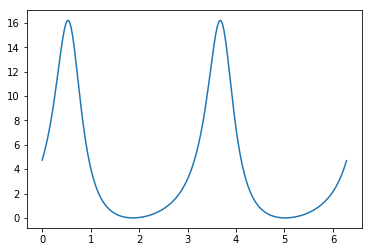

In [34]:
# 2(c) Exploring effects of using Funbalanced

print("Using Funbalanced")
# Choosing the W of the first plot
W = np.array([12, 4])
maximum = 0
angle = 0

Fresults = []
for theta in np.linspace(0,6.28,180):  
    # Making theta vary between 0 and 360 degrees
    R = np.array([[np.cos(theta), -np.sin(theta)], 
                  [np.sin(theta), np.cos(theta)]])
    Wtheta = np.array(np.matmul(W,R))

    Y_A =[]
    Y_B =[]
    for i in range(len(X_1tot)):
        Y_A.append(np.dot(Wtheta.T,X_1tot[i, :]))

    for i in range(len(X_2tot)):
        Y_B.append(np.dot(Wtheta.T,X_2tot[i, :]))
    
    mares = np.mean(Y_A)
    mbres = np.mean(Y_B)
    sares = np.std(Y_A)
    sbres = np.std(Y_B)
    
    # Calculating Fisher ratio
    F = (((mares - mbres)**2)/((sares**2) + (sbres**2)))
    if maximum < F:
        maximum = F
        angle = theta
    Fresults.append(F)
    
Fresults =np.array(Fresults)
print("Maximum F value", maximum, "at theta=", angle)
Rmax = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), 
                                                   np.cos(angle)]])
Wthetamax = np.array(np.matmul(W,Rmax))
print("Therefore W at max F is:", Wthetamax)

fig = plt.figure()
allangles = np.linspace(0,6.28,180)
plt.plot(allangles, Fresults, '-')

# Appendix B: Data 2 - Iris Data

In [1]:
# 4.2 Iris Data set up

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

feature_dict = {i:label for i,label in zip(range(4),
                  ('Sepal Length',
                  'Sepal Width',
                  'Petal Length',
                  'Petal Width', ))}

df = pd.io.parsers.read_csv(
    filepath_or_buffer=
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )

df.columns = [l for i,l in sorted(feature_dict.items())] + ['Class']

df.dropna(how="all", inplace=True) 
# to drop the empty line at file-end

df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
# Exploring data-set features

df['Class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [37]:
print(df.groupby('Class').size())

Class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


<Figure size 432x288 with 0 Axes>

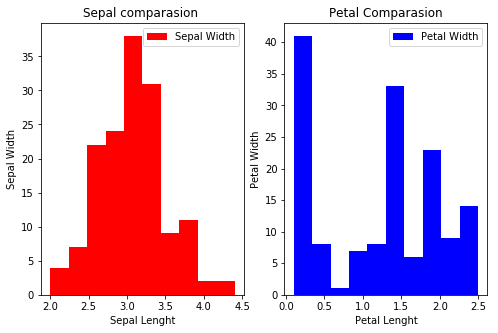

In [38]:
plt.figure()
fig,ax=plt.subplots(1,2,figsize=(8, 5))
df.plot(x="Sepal Length",y="Sepal Width",kind="hist",ax=ax[0],color='r')
df.plot(x="Petal Length",y="Petal Width",kind="hist",ax=ax[1],color='b')
ax[0].set(title='Sepal comparasion ', xlabel='Sepal Lenght', 
          ylabel='Sepal Width')
ax[1].set(title='Petal Comparasion', xlabel='Petal Lenght', 
          ylabel='Petal Width')
ax[0].legend()
ax[1].legend()

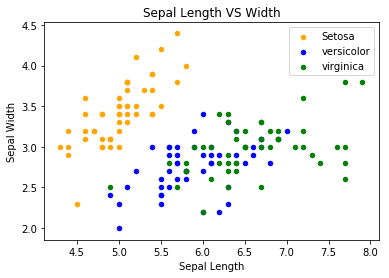

In [58]:
fig = df[df.Class=='Iris-setosa'].plot(kind='scatter',x='Sepal Length',
                                       y='Sepal Width',color='orange', 
                                       label='Setosa')
df[df.Class=='Iris-versicolor'].plot(kind='scatter',x='Sepal Length',
                                     y='Sepal Width',color='blue', 
                                     label='versicolor',ax=fig)
df[df.Class=='Iris-virginica'].plot(kind='scatter',x='Sepal Length',
                                    y='Sepal Width',color='green', 
                                    label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
plt.show()

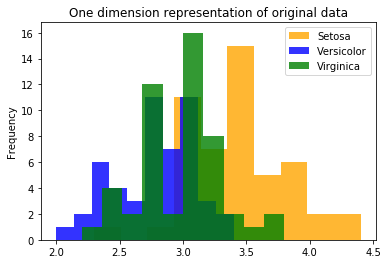

In [40]:
fig = df[df.Class=='Iris-setosa'].plot(kind='hist',x='Sepal Length',
                                       y='Sepal Width',color='orange',
                                       alpha= 0.8,label='Setosa')
df[df.Class=='Iris-versicolor'].plot(kind='hist',x='Sepal Length',
                                     y='Sepal Width',color='blue',
                                     alpha= 0.8,label='Versicolor',
                                     ax=fig)
df[df.Class=='Iris-virginica'].plot(kind='hist',x='Sepal Length',
                                    y='Sepal Width',color='green',
                                    alpha= 0.8,label='Virginica',
                                    ax=fig)
fig.set_title("One dimension representation of original data")
fig=plt.gcf()
plt.show()

In [2]:
# 1 Finding the optimal direction of w for projecting the data onto

# Calculating the overall mean for each individual parameter of the setosa
setosamean1 = df['Sepal Length'][0:50].mean()
setosamean2 = df['Sepal Width'][0:50].mean()
setosamean3 = df['Petal Length'][0:50].mean()
setosamean4 = df['Petal Width'][0:50].mean()
setosamean = [setosamean1,setosamean2,setosamean3,setosamean4]
setosamean = np.array(setosamean)
print("Overall mean of setosa parameters:\n", setosamean)

# Calculating the overall mean for each individual parameter of the versicolor
versicolormean1 = df['Sepal Length'][50:100].mean()
versicolormean2 = df['Sepal Width'][50:100].mean()
versicolormean3 = df['Petal Length'][50:100].mean()
versicolormean4 = df['Petal Width'][50:100].mean()
versicolormean = [versicolormean1,versicolormean2,versicolormean3,
                  versicolormean4]
versicolormean = np.array(versicolormean)
print("Overall mean of versicolor parameters:\n", versicolormean)

# Calculating the overall mean for each individual parameter of the virginica
virginicamean1 = df['Sepal Length'][100:150].mean()
virginicamean2 = df['Sepal Width'][100:150].mean()
virginicamean3 = df['Petal Length'][100:150].mean()
virginicamean4 = df['Petal Width'][100:150].mean()
virginicamean = [virginicamean1,virginicamean2,virginicamean3,virginicamean4]
virginicamean = np.array(virginicamean)
print("Overall mean of virginic parameters:\n", virginicamean)

# Calculating the overall mean between all the points in the dataset
overallmean = (setosamean+versicolormean+virginicamean)/3
print("Overall mean Iris Dataset parameters:\n",overallmean)

# Calculating S_B, between class covariance matrix
b_setosamean = setosamean - overallmean
b_versicolormean = versicolormean - overallmean
b_virginicamean = virginicamean - overallmean

S_B_setosa = np.matmul(b_setosamean[np.newaxis].T, b_setosamean[np.newaxis])
S_B_versicolor = np.matmul(b_versicolormean[np.newaxis].T, 
                           b_versicolormean[np.newaxis])
S_B_virginica = np.matmul(b_virginicamean[np.newaxis].T, 
                          b_virginicamean[np.newaxis])

S_Bsetosaversicolorvirginica = S_B_setosa + S_B_versicolor + S_B_virginica
print("Between class covariance matrix: \n", S_Bsetosaversicolorvirginica)

# Calculating S_W, within class covariance matrix
covmat_setosa = np.zeros((4,4))
covmat_versicolor = np.zeros((4,4))
covmat_virginica = np.zeros((4,4))
# Covariance matrix for setosa
for i in range(0, 50):
    rsetosa = np.array([df['Sepal Length'][i],df['Sepal Width'][i],
                        df['Petal Length'][i],df['Petal Width'][i]])
    rsetosa.reshape(4,1)
    setosamean.reshape(4,1)
    setosares = rsetosa - setosamean
    covmat_setosa = covmat_setosa + np.dot(setosares[np.newaxis].T, 
                                           setosares[np.newaxis])
# Covariance matrix for versicolor
for i in range(50,100):
    rversicolor = np.array([df['Sepal Length'][i],df['Sepal Width'][i],
                            df['Petal Length'][i],df['Petal Width'][i]])
    rversicolor.reshape(4,1)
    versicolormean.reshape(4,1)
    versicolorres = rversicolor - versicolormean
    covmat_versicolor = covmat_versicolor + np.dot(versicolorres[np.newaxis].T, 
                                                   versicolorres[np.newaxis])
# Covariance matrix for virginica
for i in range(100,150):
    rvirginica = np.array([df['Sepal Length'][i],df['Sepal Width'][i],
                           df['Petal Length'][i],df['Petal Width'][i]])
    rvirginica.reshape(4,1)
    virginicamean.reshape(4,1)
    virginicares = rvirginica - virginicamean
    covmat_virginica = covmat_virginica + np.dot(virginicares[np.newaxis].T, 
                                                 virginicares[np.newaxis])
# Calculating S_W using total covariance matrix for iris dataset
S_Wsetosaversicolorvirginica = covmat_setosa + covmat_versicolor + covmat_virginica
print("Within class covariance matrix: \n", S_Wsetosaversicolorvirginica)

# Solving the eigenvalue problem and sorting them
r = np.linalg.inv(S_Wsetosaversicolorvirginica)
eigenvalues, eigenvectors = np.linalg.eig(r.dot(S_Bsetosaversicolorvirginica))

sorted_eigenvalues = np.sort(eigenvalues)
sorted_eigenvectors = eigenvectors[:,eigenvalues.argsort()]
print("Eigenvalues: \n", sorted_eigenvalues)
print("Eigenvectors: \n", sorted_eigenvectors)

# Choosing the eigenvalues and eigenvectors to keep
# Keep just the two biggest eigenvalues(the other two brings almost 0 informatios)
choice_eigenvalues = sorted_eigenvalues[-2:]  
# Pick just the two corrisponding eigenvectors to the two chosen aigenvalues 
choice_eigenvectors = sorted_eigenvectors[:,-2:]  
result_eigenvectors = np.zeros((4,2))
# Sort the remaining eigenvectors to put the most relevant one in the first column
# Swap the two columns of choice_eigenvectors and call the result result_eigenvectors.
result_eigenvectors[:,0] = choice_eigenvectors[:,1] 
result_eigenvectors[:,1] = choice_eigenvectors[:,0]  
# The optimal W is equal to the first column of result_eigenvectors 
# (most relevant eigenvalue -> eigenvector)
W = result_eigenvectors[:,0]


# Y = X*W
LDA_Y = df.loc[:,'Sepal Length':'Petal Width'].dot(W)

# Checking if the generalised eigenvalue condition holds
for i in range(len(eigenvalues)):
    answerchecking = np.dot(np.subtract(S_Bsetosaversicolorvirginica, 
                                np.dot(eigenvalues[i], S_Wsetosaversicolorvirginica)), 
                            eigenvectors[:,i])
    print ( i+1, 'Generalised eigenvalue condition holds: \n' ,answerchecking)

Overall mean of setosa parameters:
 [5.006 3.418 1.464 0.244]
Overall mean of versicolor parameters:
 [5.936 2.77  4.26  1.326]
Overall mean of virginic parameters:
 [6.588 2.974 5.552 2.026]
Overall mean Iris Dataset parameters:
 [5.84333333 3.054      3.75866667 1.19866667]
Between class covariance matrix: 
 [[ 1.26424267 -0.39068     3.30329333  1.42726133]
 [-0.39068     0.219552   -1.121104   -0.449848  ]
 [ 3.30329333 -1.121104    8.73287467  3.73816267]
 [ 1.42726133 -0.449848    3.73816267  1.61208267]]
Within class covariance matrix: 
 [[38.9562 13.683  24.614   5.6556]
 [13.683  17.035   8.12    4.9132]
 [24.614   8.12   27.22    6.2536]
 [ 5.6556  4.9132  6.2536  6.1756]]
Eigenvalues: 
 [-6.43714196e-17  7.60059237e-17  5.55133728e-03  6.45439156e-01]
Eigenvectors: 
 [[-0.72008029  0.09086414 -0.00898234 -0.20490976]
 [ 0.43469186  0.30540331 -0.58899857 -0.38714331]
 [ 0.45400753  0.37709176  0.25428655  0.54648218]
 [-0.29394646 -0.86964035 -0.76703217  0.71378517]]
1 Gene

Using the optimal W:  [-0.20490976 -0.38714331  0.54648218  0.71378517]


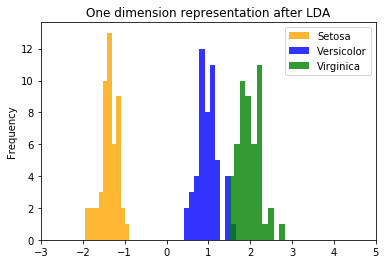

In [3]:
# 2 Displaying the histograms of the 3 classes 
# in the reduced dimensional space

print("Using the optimal W: ", W)
fig = LDA_Y[df.Class=='Iris-setosa'].plot(kind='hist',x='Sepal Length',
                                          y='Sepal Width',
                                          color='orange',
                                          alpha= 0.8,label='Setosa')
LDA_Y[df.Class=='Iris-versicolor'].plot(kind='hist',x='Sepal Length',
                                        y='Sepal Width',color='blue',
                                        alpha= 0.8,label='Versicolor'
                                        ,ax=fig)
LDA_Y[df.Class=='Iris-virginica'].plot(kind='hist',x='Sepal Length',
                                       y='Sepal Width',color='green',
                                       alpha= 0.8,label='Virginica'
                                       ,ax=fig)
fig.set_title("One dimension representation after LDA")
fig.legend()
plt.xlim([-3,5])
fig=plt.gcf()
plt.show()

Modified W: [-0.2138921  -0.97614188  0.80076872 -0.053247  ]


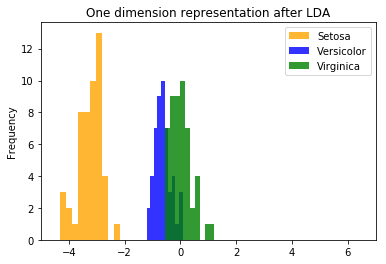

In [4]:
# 3 Projecting a different vector 
# instead of the generalised eigenvector W

# Taking first column of result_eigenvectors
W = result_eigenvectors[:,0]
Wnotopt = result_eigenvectors[:,1]

W = W + Wnotopt
print("Modified W:", W)

# Y = X*W
LDAW_Y = df.loc[:,'Sepal Length':'Petal Width'].dot(W)

fig= LDAW_Y[df.Class=='Iris-setosa'].plot(kind='hist',x='Sepal Length',
                                          y='Sepal Width',color='orange',
                                          alpha= 0.8,label='Setosa')
LDAW_Y[df.Class=='Iris-versicolor'].plot(kind='hist',x='Sepal Length',
                                         y='Sepal Width',color='blue',
                                         alpha= 0.8,label='Versicolor'
                                        ,ax=fig)
LDAW_Y[df.Class=='Iris-virginica'].plot(kind='hist',x='Sepal Length',
                                        y='Sepal Width',color='green',
                                        alpha= 0.8,label='Virginica'
                                       ,ax=fig)
fig.set_title("One dimension representation after LDA")
fig.legend()
plt.xlim([-5,7])
fig=plt.gcf()
plt.show()

# Appendix C: Performing linear regression

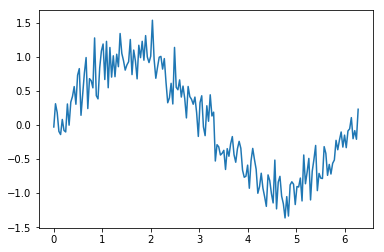

In [71]:
# 5.1 Set-up Performing linear regression

import matplotlib.pyplot as plt
import numpy as np
import random

# Creating and plotting sin function with added noise
Ylist = []
for theta in np.linspace(0,6.28,180):
    Y = np.sin(theta) + 0.2*np.random.normal(0,1)
    Ylist.append(Y)
    
Ylist = np.array(Ylist)
X = np.linspace(0,6.28,180)
    
fig = plt.figure()
plt.plot(X, Ylist, '-')
plt.show()

In [132]:
# 1 Learning the weights by minimising the loss function 
# by gradient descent

# Definying a fuction to calculate gradient descent
def gradientdescent(poly, Ylist, w0, w, lrate, niter):
    n, p = poly.shape
    whistory = []
    losshistory = []
    for i in range(niter):
        Xres = np.dot(poly, w)
        Xres = np.array(Xres)
        loss = np.square(Ylist-w0 - Xres).mean() 
        +reg*np.linalg.norm(C)**2 # Loss function
        whistory.append(w)
        losshistory.append(loss)
        grad = (-2/n)*poly.T.dot((Ylist-w0 - Xres)) 
        +2*reg*C # Derivative of loss function
        w = w - lrate*grad # Updating weights
    return w, np.asarray(whistory), np.asarray(losshistory)

# Deciding a value for w 
w = [-1, 2, 1, 2]
w = np.array(w)

niter = 90000 # number of iterations
lrate = 0.0001 # learning rate
reg = 0.0001 # Regularization
C = (w) # penalty on the norm

# Calculating X, our A Matrix, first column= 1, 
# second=X, thrid=X**2, fourth=X**3
columns, rows = 4, 180;
poly = [[0 for x in range(columns)] for y in range(rows)] 
poly = np.array(poly)
poly = np.stack((np.ones(180), X, X**2,X**3)).T

# Deciding w0 value (180 random values)
w0 = np.random.randn(180)
w0 = np.array(w0)

# Calling gradient descent function to perform calculations
gradientdescent(poly, Ylist, w0, w, lrate, niter)

(array([-0.02761824,  1.63716421, -0.81286252,  0.08858719]),
 array([[-1.        ,  2.        ,  1.        ,  2.        ],
        [-1.02861364,  1.85715962,  0.25500374, -2.0044044 ],
        [-1.00530142,  1.97521617,  0.87700037,  1.36225983],
        ...,
        [-0.02762424,  1.63717159, -0.81286489,  0.08858741],
        [-0.02762224,  1.63716913, -0.8128641 ,  0.08858734],
        [-0.02762024,  1.63716667, -0.81286331,  0.08858726]]),
 array([4.51442608e+04, 3.18987825e+04, 2.25410202e+04, ...,
        1.00360547e+00, 1.00360536e+00, 1.00360525e+00]))

Using W calculated using gradient descent: 
 [-0.02761824, 1.63716421, -0.81286252, 0.08858719]


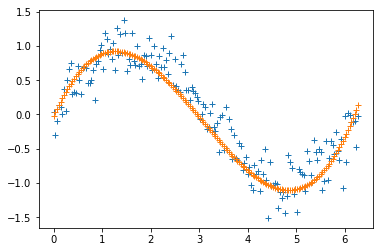

In [133]:
# Plotting the sinusoind using the calculated weights 
# and comparing the results with the original plot 

w = [-0.02761824,  1.63716421, -0.81286252,  0.08858719]
print("Using W calculated using gradient descent: \n",w)

# Updating our Y values using the new w just calculated
Yresgr = np.dot(poly, w)
Yresgr = np.array(Yresgr)

# Plotting superimposed the old sin + noise graph 
# and the new result
fig = plt.figure()
plt.plot(X, Ylist, '+')
plt.plot(X, Yresgr, '+')
plt.show()

W is equal to:  [-0.26489934  1.97699657 -0.89175674  0.09389989]


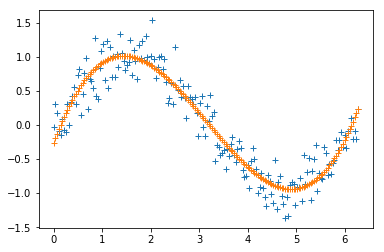

In [74]:
# 2 Obtaining weights from analytical expression

# Deciding a lambda regularization value
reg = 0.0001

# Calculating X, our A Matrix, first column= 1, 
# second=X, thrid=X**2, fourth=X**3
columns, rows = 4, 180;
poly = [[0 for x in range(columns)] for y in range(rows)] 
poly = np.array(poly)
poly = np.stack((np.ones(180), X, X**2,X**3)).T

# Making an identity matrix of 4*4
idmatrix = np.eye(4, dtype=int)
idmatrix = np.array(idmatrix)

# Solving the formula to calculate the new w
wres1 = np.dot(poly.T, poly)
wres2 = reg*idmatrix
wres3 = wres1 + wres2
inv = np.linalg.inv(wres3)
wres4 = np.dot(inv, poly.T)
w = np.dot(wres4,Ylist)
print("W is equal to: ",w)

# Updating our Y values using the new w just calculated
Yres = np.dot(poly, w)
Yres = np.array(Yres)

# Plotting superimposed the old sin + noise graph 
# and the new result
fig = plt.figure()
plt.plot(X, Ylist, '+')
plt.plot(X, Yres, '+')
plt.show()

In [73]:
# 3 Split data into training and test and measure mean 
# of the squared residuals on the test set

# Split analytical expression data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

X = np.linspace(0,6.28,180)

# split data into training and test data.
train_X, test_X, train_Yres, test_Yres = train_test_split(X, 
        Ylist, train_size=0.7, test_size=0.3, random_state=123)

# Making design matrix (A matrix) using test_X
columns, rows = 4, len(test_X);
polyxt = [[0 for x in range(columns)] for y in range(rows)] 
polyxt = np.array(poly)
polyxt = np.stack((np.ones(len(test_X)), test_X, test_X**2,test_X**3)).T

# Using optimal vector found using analytic expression
wtest = [-0.22045124 , 1.9495184 , -0.89125233 , 0.09400267]
wtest = np.array(wtest)

# Making prediction for Y using the desing matrix made using test_X and 
# the optimal w vector found using analytic expression
Yxtest = np.dot(polyxt ,wtest.T)

# Calculating mean squared error comparing the the real Y output in test_Yres 
# against our made predisction Yxtest
sqrres = mean_squared_error(test_Yres, Yxtest) 
print("Mean of squared residuals on general test set: " ,sqrres)

Mean of squared residuals on general test set:  0.06507285924574796


Mean of squared residuals increasing polynomial degree from 1 to 8: 
 [0.23677625 0.23568364 0.04923766 0.04935192 0.04719929 0.0474031
 0.04768083 0.04766791]


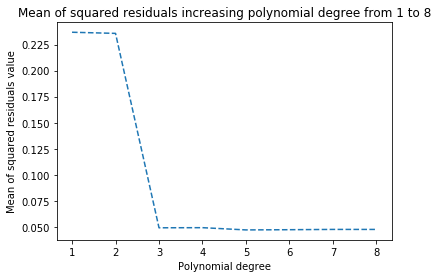

In [75]:
# 3(a) Plot RMS as a function of the complexity of the model
# Using analytical expression

# Split analytical expression data
from sklearn.model_selection import train_test_split
from math import sqrt

X = np.linspace(0,6.28,180)

# Calculating polynum, our A Matrix, the number of columns 
# varies depending on the number of iterations 
# of polynum in the for loop

reg = 0.0001

train_X, test_X, train_Yres, test_Yres = train_test_split(X, 
    Ylist, train_size=0.7, test_size=0.3)

exppoly = []
for polynum in range(2,10):
    columns, rows = polynum, len(train_X);
    polyt = [[0 for x in range(columns)] for y in range(rows)] 
    polyt = np.array(poly)
    if polynum == 2:
        polyt = np.stack((np.ones(len(train_X)),train_X)).T
    elif polynum == 3:
        polyt = np.stack((np.ones(len(train_X)),train_X, train_X**2)).T
    elif polynum == 4:
        polyt = np.stack((np.ones(len(train_X)),train_X, train_X**2,
                         train_X**3)).T
    elif polynum == 5:
        polyt = np.stack((np.ones(len(train_X)),train_X, train_X**2,
                         train_X**3, train_X**4)).T
    elif polynum == 6:
        polyt = np.stack((np.ones(len(train_X)),train_X, train_X**2,
                         train_X**3, train_X**4, train_X**5)).T
    elif polynum == 7:
        polyt = np.stack((np.ones(len(train_X)),train_X, train_X**2,
                         train_X**3, train_X**4, train_X**5, train_X**6)).T
    elif polynum == 8:
        polyt = np.stack((np.ones(len(train_X)),train_X, train_X**2,
                         train_X**3, train_X**4, train_X**5, train_X**6, 
                         train_X**7)).T
    elif polynum == 9:
        polyt = np.stack((np.ones(len(train_X)),train_X, train_X**2,
                         train_X**3, train_X**4, train_X**5, train_X**6, 
                         train_X**7, train_X**8)).T
        
    columns, rows = polynum, len(test_X);
    poly = [[0 for x in range(columns)] for y in range(rows)] 
    poly = np.array(poly)
    if polynum == 2:
        poly = np.stack((np.ones(len(test_X)),test_X)).T
    elif polynum == 3:
        poly = np.stack((np.ones(len(test_X)),test_X, test_X**2)).T
    elif polynum == 4:
        poly = np.stack((np.ones(len(test_X)),test_X, test_X**2,
                         test_X**3)).T
    elif polynum == 5:
        poly = np.stack((np.ones(len(test_X)),test_X, test_X**2,
                         test_X**3, test_X**4)).T
    elif polynum == 6:
        poly = np.stack((np.ones(len(test_X)),test_X, test_X**2,
                         test_X**3, test_X**4, test_X**5)).T
    elif polynum == 7:
        poly = np.stack((np.ones(len(test_X)),test_X, test_X**2,
                         test_X**3, test_X**4, test_X**5, test_X**6)).T
    elif polynum == 8:
        poly = np.stack((np.ones(len(test_X)),test_X, test_X**2,
                         test_X**3, test_X**4, test_X**5, test_X**6, 
                         test_X**7)).T
    elif polynum == 9:
        poly = np.stack((np.ones(len(test_X)),test_X, test_X**2,
                         test_X**3, test_X**4, test_X**5, test_X**6, 
                         test_X**7, test_X**8)).T
    # Making an identity matrix of polynum*polynum
    idmatrix = np.eye(polynum, dtype=int)
    idmatrix = np.array(idmatrix)
    # Solving the formula to calculate the new w
    wres1 = np.dot(polyt.T, polyt)
    wres2 = reg*idmatrix
    wres3 = wres1 + wres2
    inv = np.linalg.inv(wres3)
    wres4 = np.dot(inv, polyt.T)
    w = np.dot(wres4,train_Yres)
    # Updating our Y values using the new w just calculated
    Yressq = np.dot(poly, w)
    Yressq = np.array(Yressq)
    # Calculating squared residuals mean
    squared_error = (Yressq - test_Yres) ** 2
    sum_squared_error = np.sum(squared_error)
    sqrres = sum_squared_error / test_Yres.size
    exppoly.append(sqrres)

exppoly = np.array(exppoly)
print("Mean of squared residuals increasing polynomial \
degree from 1 to 8: \n", exppoly)

polynum = [1,2,3,4,5,6,7,8]

fig = plt.figure()
plt.title("Mean of squared residuals increasing polynomial degree \
from 1 to 8")
plt.xlabel("Polynomial degree")
plt.ylabel("Mean of squared residuals value")
plt.plot(polynum, exppoly, '--')
plt.show()

Values of mean of squared residuals coefficient: 
 [0.05404299 0.0540428  0.05404261 ... 0.05970921 0.05971015 0.05971109]


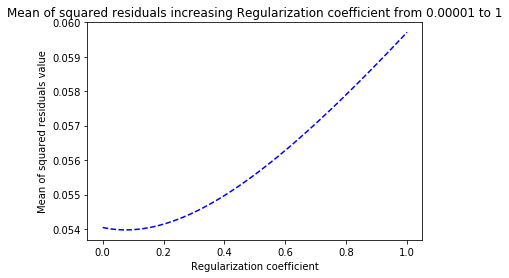

In [76]:
# 3(b) Plot RMS as a function of the strength 
# of the regularisation coefficient λ
# Using analytical expression

# Calculating X, our A Matrix, first column= 1, 
# second=X, thrid=X**2, fourth=X**3
train_X, test_X, train_Yres, test_Yres = train_test_split(X, 
    Ylist, train_size=0.7, test_size=0.3)

columns, rows = 4, len(train_X);
poly = [[0 for x in range(columns)] for y in range(rows)] 
poly = np.array(poly)
poly = np.stack((np.ones(len(train_X)), train_X, train_X**2,train_X**3)).T

columns, rows = 4, len(test_X);
polyt = [[0 for x in range(columns)] for y in range(rows)] 
polyt = np.array(polyt)
polyt = np.stack((np.ones(len(test_X)), test_X, test_X**2,test_X**3)).T

# Making an identity matrix of 4*4
idmatrix = np.eye(4, dtype=int)
idmatrix = np.array(idmatrix)

expreg = []
for reg in np.linspace(0.00001,1,10000):
    # Solving the formula to calculate the new w
    wres1 = np.dot(poly.T, poly)
    wres2 = reg*idmatrix
    wres3 = wres1 + wres2
    inv = np.linalg.inv(wres3)
    wres4 = np.dot(inv, poly.T)
    w = np.dot(wres4,train_Yres)
    # Updating our Y values using the new w just calculated
    Yresreg = np.dot(polyt, w)
    Yresreg = np.array(Yresreg)
    squared_error = (Yresreg - test_Yres) ** 2
    sum_squared_error = np.sum(squared_error)
    sqrres = sum_squared_error / test_Yres.size
    expreg.append(sqrres)

expreg = np.array(expreg)
print("Values of mean of squared residuals coefficient: \n", 
      expreg)

reg = np.linspace(0.00001,1,10000)

fig = plt.figure()
plt.title("Mean of squared residuals increasing Regularization \
coefficient from 0.00001 to 1")
plt.xlabel("Regularization coefficient")
plt.ylabel("Mean of squared residuals value")
plt.plot(reg, expreg,  'b--')
plt.show()

# Appendix D: How does linear regression generalise?

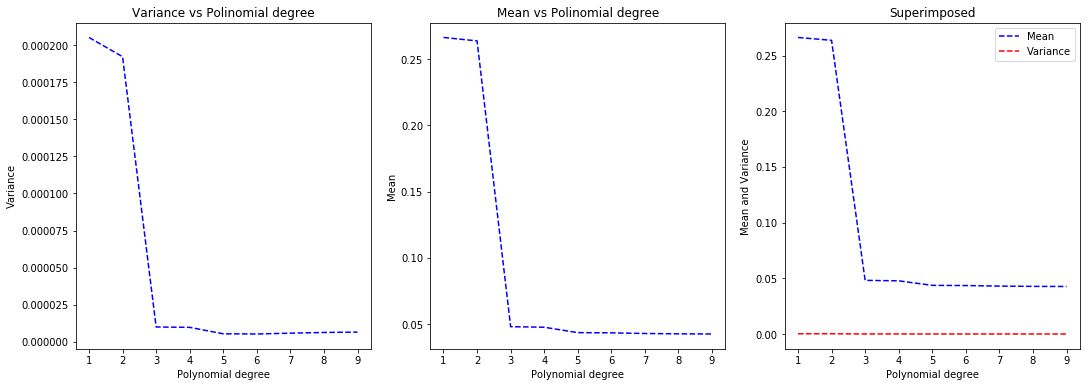

In [77]:
# 5.2 How does linear regression generalise?
# 1 test error

# Split analytical expression data
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import random

X = np.linspace(0,6.28,180)
Ylist = np.array(Ylist)

reg = 0.0001

# split data into training and test data.
train_X, test_X, train_Yres, test_Yres = train_test_split(X, 
                    Ylist, train_size=0.7, test_size=0.3, random_state=123)

# Splitting our training set into ten random smaller training sets
# and storing the corrisponding X and Y coordinates in subdatax
# and subdatay
subdatax = []
subdatay = []
for i in range(0,10):
    subtrain_X, subtest_X, subtrain_Yres, subtest_Yres = train_test_split(train_X, 
                                    train_Yres, train_size=0.7, test_size=0.3)
    subdatax.append(subtrain_X)
    subdatay.append(subtrain_Yres)

    
subdatax = np.array(subdatax)
subdatay = np.array(subdatay)

#print(subdatax.shape)

# Definying a function to calculate weights and squared mean loss
# using anaylitical expression. x=is the x sub-dataset coordinates
# in consideration, y= is the y sub-dataset coordinates
# in consideration and deg= is the chosen polynomial degree 
# for the design matrix
def anlytics(x,y, deg):

    # Calculating X, our A Matrix
    columns, rows = deg, len(x);
    poly = [[0 for x in range(columns)] for y in range(rows)] 
    poly = np.array(poly)
    if deg == 1:
        poly = np.stack((np.ones(len(x)),x)).T
    elif deg == 2:
        poly = np.stack((np.ones(len(x)),x, x**2)).T
    elif deg == 3:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3)).T
    elif deg == 4:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3, x**4)).T
    elif deg == 5:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3, x**4, x**5)).T
    elif deg == 6:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3, x**4, x**5, x**6)).T
    elif deg == 7:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3, x**4, x**5, x**6, 
                         x**7)).T
    elif deg == 8:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3, x**4, x**5, x**6, 
                         x**7, x**8)).T
    elif deg == 9:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3, x**4, x**5, x**6, 
                         x**7, x**8, x**9)).T
    elif deg == 10:
        poly = np.stack((np.ones(len(x)),x, x**2,
                         x**3, x**4, x**5, x**6, 
                         x**7, x**8, x**9, x**10)).T
    
    # Making an identity matrix
    idmatrix = np.eye(deg+1, dtype=int)
    idmatrix = np.array(idmatrix)
    
    # Making subloss global so that it can be used 
    # outside this function
    global subloss 
    subloss = []
    # Solving the formula to calculate the new w
    wres1 = np.dot(poly.T, poly)
    wres2 = reg*idmatrix
    wres3 = wres1 + wres2
    inv = np.linalg.inv(wres3)
    wres4 = np.dot(inv, poly.T)
    w = np.dot(wres4,y)
    #print("W is equal to: ",w)
    # Updating our Y values using the new w just calculated
    Yresran = np.dot(poly, w)
    Yresran = np.array(Yresran)
    # Calculating mean squared error
    squared_error = (Yresran - y) ** 2
    sum_squared_error = np.sum(squared_error)
    sqrres = sum_squared_error / y.size
    subloss.append(sqrres)
    subloss = np.array(subloss)
    #print(deg,"Mean of the squared residuals: ",subloss)
    return subloss

#polydeg = []
#for i in range(0,10):
#    print("Sub-dataset number: ", i+1)
 #   for j in range(1,11):
  #      print("Polinomial degree: ", j)
   #     anlytics(subdatax[i], subdatay[i], j)
    #    polydeg.append(subloss)
    
# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 1 
polydeg1 = []
j =1 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg1.append(subloss)
polydeg1 = np.array(polydeg1)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 2 
polydeg2 = []
j =2 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg2.append(subloss)
polydeg2 = np.array(polydeg2)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 3
polydeg3 = []
j =3 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg3.append(subloss)
polydeg3 = np.array(polydeg3)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 4
polydeg4 = []
j =4 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg4.append(subloss)
polydeg4 = np.array(polydeg4)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 5
polydeg5 = []
j =5 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg5.append(subloss)
polydeg5 = np.array(polydeg5)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 6
polydeg6 = []
j =6 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg6.append(subloss)
polydeg6 = np.array(polydeg6)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 7
polydeg7 = []
j =7 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg7.append(subloss)
polydeg7 = np.array(polydeg7)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 8
polydeg8 = []
j =8 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg8.append(subloss)
polydeg8 = np.array(polydeg8)

# Making an array with all the sum quared error values of 
# all the 10 sub-dataset, keeping the x polinomial to 9
polydeg9 = []
j =9 
for i in range(0,10):
    #print("Sub-dataset number: ", i+1)
    anlytics(subdatax[i], subdatay[i], j)
    polydeg9.append(subloss)
polydeg9 = np.array(polydeg9)

# Calculating mean and variance of all the sum quared error values
# for each polynomial degree
mean1  = np.mean(polydeg1)
variance1 = np.var(polydeg1)
mean2  = np.mean(polydeg2)
variance2 = np.var(polydeg2)
mean3  = np.mean(polydeg3)
variance3 = np.var(polydeg3)
mean4  = np.mean(polydeg4)
variance4 = np.var(polydeg4)
mean5  = np.mean(polydeg5)
variance5 = np.var(polydeg5)
mean6  = np.mean(polydeg6)
variance6 = np.var(polydeg6)
mean7  = np.mean(polydeg7)
variance7 = np.var(polydeg7)
mean8  = np.mean(polydeg8)
variance8 = np.var(polydeg8)
mean9  = np.mean(polydeg9)
variance9 = np.var(polydeg9)

# Making an array with all the variances
variancetot = [variance1,variance2,variance3,variance4,
               variance5,variance6,variance7,variance8,variance9]
# Making an array with all the means
meantot = [mean1,mean2,mean3,mean4,mean5,mean6,mean7,mean8,mean9]
degres = [1,2,3,4,5,6,7,8,9]

fig, axes = plt.subplots(figsize=(18,6),nrows= 1,ncols=3)
axes[0].plot(degres, variancetot, 'b--')
axes[0].set_title("Variance vs Polinomial degree")
axes[0].set_xlabel('Polynomial degree')
axes[0].set_ylabel('Variance')

axes[1].plot(degres, meantot, 'b--')
axes[1].set_title("Mean vs Polinomial degree")
axes[1].set_xlabel('Polynomial degree')
axes[1].set_ylabel('Mean')

axes[2].plot(degres, meantot, 'b--', label='Mean')
axes[2].plot(degres, variancetot, 'r--', label='Variance')
axes[2].set_title("Superimposed")
axes[2].set_xlabel('Polynomial degree')
axes[2].set_ylabel('Mean and Variance')
axes[2].legend()